In [3]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(61), [0, 0, 0, 7, 21])
print("Order of E =", E.order())
P = E([9, 9])
Q = E([33,57])

k, log = SmartAttack(P, Q, 61, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 61
Recovered k: 15
Log: {'time_total': 0.006571054458618164, 'time_liftP': 0.002761363983154297, 'time_liftQ': 0.00046539306640625, 'retries': 0}


In [10]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(211), [0, 0, 0, 1, 26])
print("Order of E =", E.order())
P = E([6, 44])
Q = 147*P#E([33,57])

k, log = SmartAttack(P, Q, 211, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 211
Recovered k: 147
Log: {'time_total': 0.009326696395874023, 'time_liftP': 0.001699209213256836, 'time_liftQ': 0.0003561973571777344, 'retries': 0}


In [13]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(787), [0, 0, 0, 1, 85])
print("Order of E =", E.order())
P = E([6, 404])
Q = 578*P#E([33,57])

k, log = SmartAttack(P, Q, 787, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 787
Recovered k: 578
Log: {'time_total': 0.01867365837097168, 'time_liftP': 0.0027184486389160156, 'time_liftQ': 0.0008459091186523438, 'retries': 0}


In [12]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(1493), [0, 0, 0, 1, 20])
print("Order of E =", E.order())
P = E([41, 464])
Q = 576*P#E([33,57])

k, log = SmartAttack(P, Q, 1493, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 1493
Recovered k: 576
Log: {'time_total': 0.010606050491333008, 'time_liftP': 0.001455068588256836, 'time_liftQ': 0.00024366378784179688, 'retries': 0}


In [13]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(6287), [0, 0, 0, 1, 1795])
print("Order of E =", E.order())
P = E([38, 781])
Q = 2387*P#E([33,57])

k, log = SmartAttack(P, Q, 6287, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 6287
Recovered k: 2387
Log: {'time_total': 0.010593891143798828, 'time_liftP': 0.002488851547241211, 'time_liftQ': 0.0004589557647705078, 'retries': 0}


In [15]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(49171), [0, 0, 0, 1, 1323])
print("Order of E =", E.order())
P = E([8145, 12269])
Q = 18765*P#E([33,57])

k, log = SmartAttack(P, Q, 49171, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 49171
Recovered k: 18765
Log: {'time_total': 0.015842199325561523, 'time_liftP': 0.0070171356201171875, 'time_liftQ': 0.0005190372467041016, 'retries': 0}


In [16]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(739397), [0, 0, 0, 1, 8576])
print("Order of E =", E.order())
P = E([481288,591092])
Q = 678765*P#E([33,57])

k, log = SmartAttack(P, Q, 739397, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 739397
Recovered k: 678765
Log: {'time_total': 0.012257814407348633, 'time_liftP': 0.002457857131958008, 'time_liftQ': 0.0004544258117675781, 'retries': 0}


In [17]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(9876413), [0, 0, 0, 1, 2748])
print("Order of E =", E.order())
P = E([3389659,4281381])
Q = 6786765*P#E([33,57])

k, log = SmartAttack(P, Q, 9876413, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 9876413
Recovered k: 6786765
Log: {'time_total': 0.010073661804199219, 'time_liftP': 0.0018224716186523438, 'time_liftQ': 0.00033593177795410156, 'retries': 0}


In [18]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(971767), [0, 0, 0, 1, 2114])
print("Order of E =", E.order())
P = E([768383,307467])
Q = 678675*P#E([33,57])

k, log = SmartAttack(P, Q, 971767, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 971767
Recovered k: 678675
Log: {'time_total': 0.012492179870605469, 'time_liftP': 0.0019233226776123047, 'time_liftQ': 0.000377655029296875, 'retries': 0}


In [19]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(823553), [0, 0, 0, 1, 3550])
print("Order of E =", E.order())
P = E([749291,346585])
Q = 671575*P#E([33,57])

k, log = SmartAttack(P, Q, 823553, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 823553
Recovered k: 671575
Log: {'time_total': 0.012156486511230469, 'time_liftP': 0.0020482540130615234, 'time_liftQ': 0.0003941059112548828, 'retries': 0}


In [7]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(7715177), [0, 0, 0, 1, 41191])
print("Order of E =", E.order())
P = E([3250318,3442928])
Q = 6715759*P#E([33,57])

k, log = SmartAttack(P, Q, 7715177, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 7715177
Recovered k: 6715759
Log: {'time_total': 0.016621828079223633, 'time_liftP': 0.0023279190063476562, 'time_liftQ': 0.0005252361297607422, 'retries': 0}


In [4]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(492113), [0, 0, 0, 1, 3700])
print("Order of E =", E.order())
P = E([1441,100818])
Q = 315759*P#E([33,57])

k, log = SmartAttack(P, Q, 492113, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 492113
Recovered k: 315759
Log: {'time_total': 0.013718128204345703, 'time_liftP': 0.002251148223876953, 'time_liftQ': 0.0005371570587158203, 'retries': 0}


In [3]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(8396981), [0, 0, 0, 1, 60387])
print("Order of E =", E.order())
P = E([4065432,6420508])
Q = 5315739*P#E([33,57])

k, log = SmartAttack(P, Q, 8396981, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 8396981
Recovered k: 5315739
Log: {'time_total': 0.015752315521240234, 'time_liftP': 0.0023009777069091797, 'time_liftQ': 0.000579833984375, 'retries': 0}


In [5]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(96911), [0, 0, 0, 1, 4115])
print("Order of E =", E.order())
P = E([73549,93995])
Q = 53157*P#E([33,57])

k, log = SmartAttack(P, Q, 96911, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 96911
Recovered k: 53157
Log: {'time_total': 0.006554603576660156, 'time_liftP': 0.0009429454803466797, 'time_liftQ': 0.0007023811340332031, 'retries': 0}


In [6]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(81119), [0, 0, 0, 1, 2058])
print("Order of E =", E.order())
P = E([24018,43237])
Q = 63857*P#E([33,57])

k, log = SmartAttack(P, Q, 81119, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 81119
Recovered k: 63857
Log: {'time_total': 0.01345682144165039, 'time_liftP': 0.0021185874938964844, 'time_liftQ': 0.0004794597625732422, 'retries': 0}


In [7]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(9973), [0, 0, 0, 1, 670])
print("Order of E =", E.order())
P = E([5502,6635])
Q = 6857*P#E([33,57])

k, log = SmartAttack(P, Q, 9973, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 9973
Recovered k: 6857
Log: {'time_total': 0.017327308654785156, 'time_liftP': 0.0026426315307617188, 'time_liftQ': 0.0006458759307861328, 'retries': 0}


In [8]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(8069), [0, 0, 0, 1, 741])
print("Order of E =", E.order())
P = E([7216,3162])
Q = 7837*P#E([33,57])

k, log = SmartAttack(P, Q, 8069, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 8069
Recovered k: 7837
Log: {'time_total': 0.024863481521606445, 'time_liftP': 0.006269216537475586, 'time_liftQ': 0.0008542537689208984, 'retries': 0}


In [9]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(983), [0, 0, 0, 1, 53])
print("Order of E =", E.order())
P = E([857,795])
Q = 787*P#E([33,57])

k, log = SmartAttack(P, Q, 983, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 983
Recovered k: 787
Log: {'time_total': 0.01218724250793457, 'time_liftP': 0.002253293991088867, 'time_liftQ': 0.0004885196685791016, 'retries': 0}


In [23]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(6181009), [0, 0, 0, 1, 2426])
print("Order of E =", E.order())
P = E([1026694,3972468])
Q = 5787345*P#E([33,57])

k, log = SmartAttack(P, Q, 6181009, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 6181009
Recovered k: 5787345
Log: {'time_total': 0.010489463806152344, 'time_liftP': 0.0008094310760498047, 'time_liftQ': 0.0005340576171875, 'retries': 0}


In [21]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(3223223), [0, 0, 0, 1, 2671])
print("Order of E =", E.order())
P = E([128553,2854083])
Q = 2787394*P#E([33,57])

k, log = SmartAttack(P, Q, 3223223, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 3223223
Recovered k: 2787394
Log: {'time_total': 0.012307405471801758, 'time_liftP': 0.0014362335205078125, 'time_liftQ': 0.0007882118225097656, 'retries': 0}


Linear fit: y = 97.82935652849513*x + -221.7094454032656


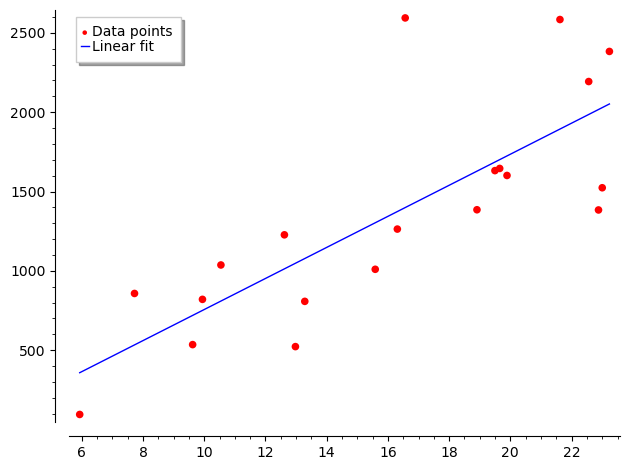

In [1]:
# Plotting data
points = [
    (5.930737338, 95.47754686),
    (7.721099189, 857.7248847),
    (9.620219826, 535.5039092),
    (9.941047606, 820.546484),
    (10.54399845, 1037.148784),
    (12.61815605, 1227.109685),
    (12.97817417, 522.8653019),
    (13.28381183, 807.9875339),
    (15.58552008, 1009.973488),
    (16.30775225, 1263.28305),
    (16.56437281, 2593.440122),
    (18.9086301, 1385.041551),
    (19.49598966, 1631.587535),
    (19.65150197, 1645.278052),
    (19.89025092, 1601.024656),
    (21.62007257, 2583.372475),
    (22.55941094, 2192.773382),
    (22.87926782, 1383.708338),
    (23.00143929, 1523.616049),
    (23.23555574, 2382.370459)
]


x_data = [p[0] for p in points]
y_data = [p[1] for p in points]

var('a b')
linear_model(x) = a*x + b
params_linear = find_fit(list(zip(x_data, y_data)), linear_model, solution_dict=True)
a_val = params_linear[a]
b_val = params_linear[b]
f_linear(x) = a_val*x + b_val
print(f"Linear fit: y = {a_val}*x + {b_val}")

point_plot = list_plot(points, color='red', size=30, legend_label='Data points')
linear_plot = plot(f_linear, (min(x_data), max(x_data)), color='blue', legend_label='Linear fit')

final_plot = point_plot + linear_plot 

show(final_plot)
